HOMEWORK 09 - SQL

Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

In [46]:
#Modules and passwords
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config_TC import pgrs_pw


In [47]:
#Establish connection to Employee_SQL database

host = "localhost"
user = "postgres"
port = "5432"
passwd = pgrs_pw
db = "Employee_SQL"

engine = create_engine(f'postgresql://{user}:{passwd}@{host}:{port}/{db}')
connection = engine.connect()


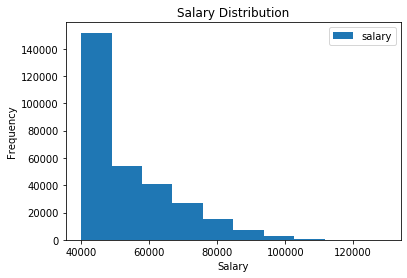

In [48]:
#Create df from salaries db table via sql query

salaries_sql_query = pd.read_sql_query('select * from salaries;', connection)
salaries_df = pd.DataFrame(salaries_sql_query, columns=['emp_no','salary'])

#Create a histogram to visualize the most common salary ranges for employees.
salaries_df.plot.hist(bins=10)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

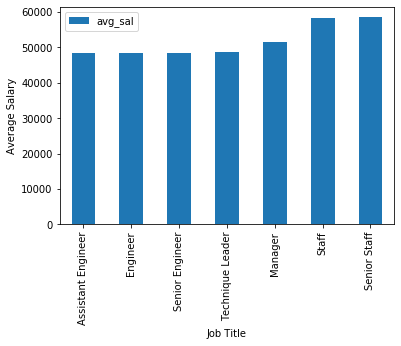

In [49]:
#Create df from query of avg salary by title

title_salary_sql_query = pd.read_sql_query('SELECT titles.title, ROUND(AVG(salaries.salary),0) AS avg_sal FROM titles JOIN employees ON titles.title_id = employees.emp_title_id JOIN salaries ON salaries.emp_no = employees.emp_no GROUP BY titles.title_id;', connection)

#Create a bar chart of average salary by title.
title_salary_df = pd.DataFrame(title_salary_sql_query, columns=['title','avg_sal'])
title_salary_df.plot.bar('title', 'avg_sal')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [50]:
#With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

joke_sql_query = pd.read_sql_query("SELECT e.emp_no, e.last_name, e.first_name, t.title, s.salary FROM employees AS e JOIN titles AS t ON t.title_id = e.emp_title_id JOIN salaries AS s ON s.emp_no = e.emp_no WHERE e.emp_no = '499942';", connection)

joke_sql_query_df = pd.DataFrame(joke_sql_query, columns = ['emp_no','last_name', 'first_name', 'title', 'salary'])
joke_sql_query_df

first_name = joke_sql_query_df.iloc[0,2]
last_name = joke_sql_query_df.iloc[0,1]
emp_no = joke_sql_query_df.iloc[0,0]

print(f'Have a great {first_name} {last_name}, employee number {emp_no}!')

Have a great April Foolsday, employee number 499942!
